In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_a = pd.read_csv('../Playground/jyp-log/13-Logistic-Regression/titanic_train.csv')
df_b = pd.read_csv('../Playground/jyp-log/13-Logistic-Regression/titanic_test.csv')
print(df_a.shape,df_b.shape)

(891, 12) (418, 11)


In [3]:
df_b

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
df_a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# df_a.drop('PassengerId',1, None,None,None,True)

In [7]:
df_a

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0F7B8B340>,
      dtype=object)

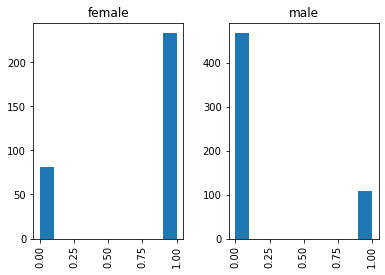

In [8]:
df_a['Survived'].hist(by=df_a['Sex'])

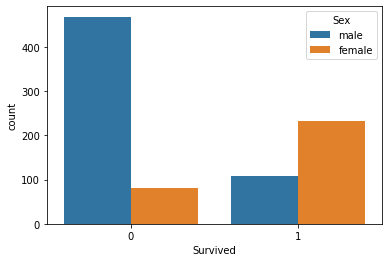

In [9]:
sns.countplot(x='Survived',hue='Sex',data=df_a)

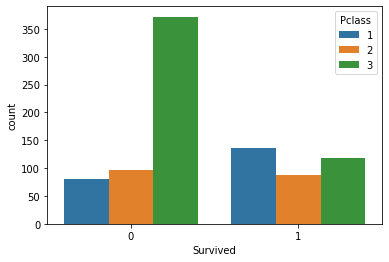

In [10]:
sns.countplot(x='Survived',hue='Pclass',data=df_a)

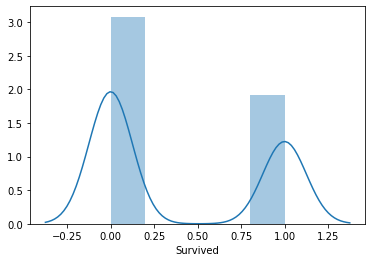

In [11]:
sns.distplot(a=df_a['Survived'])

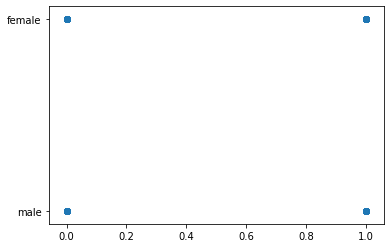

In [12]:
fig,axes = plt.subplots()
axes.scatter(x='Survived',y='Sex',data=df_a)

Correlation

In [13]:
df_a.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


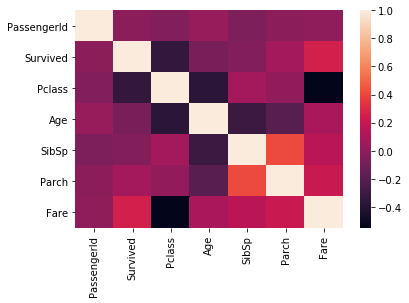

In [14]:
sns.heatmap(data = df_a.corr())

Concatenating the dataset

In [15]:
Y=df_a['Survived'].copy()
df_a_temp =df_a.drop('Survived',1)
ful = pd.concat([df_a_temp,df_b])
ful.reset_index(inplace=True)
ful

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


missing value percentage

In [16]:
(ful.isna().sum() / ful.shape[0])*100

index           0.000000
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

Filling age with the avg from respective 'Pclass' attribut

In [17]:
ful.groupby('Pclass')['Age'].apply(lambda x:print(x))

1       38.0
3       35.0
6       54.0
11      58.0
23      28.0
        ... 
1294    17.0
1295    43.0
1298    50.0
1302    37.0
1305    39.0
Name: 1, Length: 323, dtype: float64
9       14.0
15      55.0
17       NaN
20      35.0
21      34.0
        ... 
1278    57.0
1284    47.0
1292    38.0
1296    20.0
1297    23.0
Name: 2, Length: 277, dtype: float64
0       22.0
2       26.0
4       35.0
5        NaN
7        2.0
        ... 
1303    28.0
1304     NaN
1306    38.5
1307     NaN
1308     NaN
Name: 3, Length: 709, dtype: float64


Pclass
1    None
2    None
3    None
Name: Age, dtype: object

In [18]:
ful['Age'] = ful.groupby('Pclass')['Age'].transform(lambda x:x.fillna(x.mean()))
ful

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,3,"Spector, Mr. Woolf",male,24.816367,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,3,"Ware, Mr. Frederick",male,24.816367,0,0,359309,8.0500,NaN,S


dropping the 'Cabin' column as it was wy more missing values and also its categories done think matter much

In [19]:
ful.drop(['Cabin'],axis=1,inplace=True);

In [20]:
ful

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,3,"Spector, Mr. Woolf",male,24.816367,0,0,A.5. 3236,8.0500,S
1305,414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C
1306,415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,416,1308,3,"Ware, Mr. Frederick",male,24.816367,0,0,359309,8.0500,S


check for missing values

Analysing the relation between the Fare and the Embarked to fill the embarked missing values

In [21]:
ful[ful['Fare']>300 ]

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C
1234,343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C


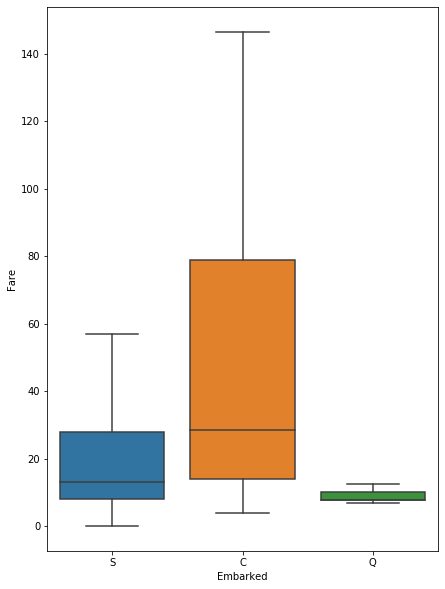

In [22]:
fig = plt.figure(figsize=(7,10))
sns.boxplot(x='Embarked',y='Fare',data=ful,showfliers = False)

In [23]:
ful.groupby('Embarked')['Fare'].median()

Embarked
C    28.51875
Q     7.75000
S    13.00000
Name: Fare, dtype: float64

In [24]:
ful.groupby('Embarked')['Fare'].mean()

Embarked
C    62.336267
Q    12.409012
S    27.418824
Name: Fare, dtype: float64

Function to sort the values of the Fare according to the Embarked attribute(whichh is the destination of boarding)

In [25]:
def impute_embarked(data):
    if(pd.isna(data[1])):
        if(0<data[0]<=20):
            return 'Q'
        elif(20<data[0]<=45):
            return 'S'
        else:
            return 'C'
    else:
        return data[1]

In [26]:
ful[ful['Embarked'].isna()]

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [27]:
ful['Embarked']=ful[['Fare','Embarked']].apply(impute_embarked,axis=1)

In [28]:
ful.iloc[61]

index                           61
PassengerId                     62
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                             38
SibSp                            0
Parch                            0
Ticket                      113572
Fare                            80
Embarked                         C
Name: 61, dtype: object

In [29]:
(ful.isna().sum() / ful.shape[0])*100

index          0.000000
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.076394
Embarked       0.000000
dtype: float64

In [30]:
ful[ful['Fare'].isna()]

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


as you can see that the Embarked is 'S' so i am goung to directly put 27 as the mean() in its category 
you can also leave some missong vaues missing : )

In [31]:
ful.loc[1043,'Fare'] = 27
ful.iloc[1043]['Fare']

27.0

In [32]:
(ful.isna().sum() / ful.shape[0])*100

index          0.0
PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

We are good to go !!!!!                           keeping  relevent data

In [33]:
ful

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,3,"Spector, Mr. Woolf",male,24.816367,0,0,A.5. 3236,8.0500,S
1305,414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C
1306,415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,416,1308,3,"Ware, Mr. Frederick",male,24.816367,0,0,359309,8.0500,S


In [34]:
ful.drop(columns=['index','PassengerId','Name','Ticket'], inplace=True)

Procedure to convet the cateorical variables

In [35]:
print(ful)
print(ful.nunique())

      Pclass     Sex        Age  SibSp  Parch      Fare Embarked
0          3    male  22.000000      1      0    7.2500        S
1          1  female  38.000000      1      0   71.2833        C
2          3  female  26.000000      0      0    7.9250        S
3          1  female  35.000000      1      0   53.1000        S
4          3    male  35.000000      0      0    8.0500        S
...      ...     ...        ...    ...    ...       ...      ...
1304       3    male  24.816367      0      0    8.0500        S
1305       1  female  39.000000      0      0  108.9000        C
1306       3    male  38.500000      0      0    7.2500        S
1307       3    male  24.816367      0      0    8.0500        S
1308       3    male  24.816367      1      1   22.3583        C

[1309 rows x 7 columns]
Pclass        3
Sex           2
Age         101
SibSp         7
Parch         8
Fare        281
Embarked      3
dtype: int64


In [36]:
ful

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
1304,3,male,24.816367,0,0,8.0500,S
1305,1,female,39.000000,0,0,108.9000,C
1306,3,male,38.500000,0,0,7.2500,S
1307,3,male,24.816367,0,0,8.0500,S


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
colt = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['Pclass','Sex','SibSp','Parch','Embarked'])])

In [38]:
X= pd.DataFrame(colt.fit_transform(ful).toarray())

In [39]:
X

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1305,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1306,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1307,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
X[['Age','Fare']]= ful[['Age','Fare']].copy()

In [41]:
X

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,Age,Fare
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.000000,7.2500
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,38.000000,71.2833
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.000000,7.9250
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.000000,53.1000
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.000000,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.816367,8.0500
1305,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39.000000,108.9000
1306,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.500000,7.2500
1307,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.816367,8.0500


In [42]:
X_train_csv=X.loc[:890].copy()
X_train_csv

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,Age,Fare
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.000000,7.2500
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,38.000000,71.2833
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.000000,7.9250
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.000000,53.1000
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.000000,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.000000,13.0000
887,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.000000,30.0000
888,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.816367,23.4500
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,26.000000,30.0000


> ## All the var with X_test_csv is the data set to be used to submit to the kaggle
### And should not be used in any sort of training,, we further split the X_train_csv to train and test set to obtain the precision

In [43]:
X_test_csv=X.loc[891:].copy()
X_test_csv

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,Age,Fare
891,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,34.500000,7.8292
892,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.000000,7.0000
893,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,62.000000,9.6875
894,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.000000,8.6625
895,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.000000,12.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.816367,8.0500
1305,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39.000000,108.9000
1306,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.500000,7.2500
1307,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,24.816367,8.0500


Now see we have combined the training and test set from the Kaggle Titanic set
#### But if we want to evauate the model we need to use the Training_csv data and split into the train and test as i  the Test_csv data we do not have Y/ Dependent Variable

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_csv, Y, test_size=0.30, random_state=101)
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(623, 25) (268, 25) (623,) (268,)


In [45]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=350)
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=350,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
predictions = logmodel.predict(X_test)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.81      0.66      0.72       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



##### <font color='red'> we got the prediction but now we have to see how to increase the precision 


> ### TRY 2)so now we will first try creating the dummy variable using pandas...........................................................................................................

In [48]:
X2 = pd.get_dummies(data = ful,columns=['Pclass','Sex','SibSp','Parch','Embarked'],drop_first=True)
X2

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_Q,Embarked_S
0,22.000000,7.2500,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,38.000000,71.2833,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26.000000,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,35.000000,53.1000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,35.000000,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,24.816367,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1305,39.000000,108.9000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1306,38.500000,7.2500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1307,24.816367,8.0500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


splittint the full set into train and test

In [49]:
X_train_csv_dummybypandas = X2.loc[:890].copy()
X_test_csv_dummybypandas = X2.loc[891:].copy()
print(X_train_csv_dummybypandas.shape,X_test_csv_dummybypandas.shape)

(891, 20) (418, 20)


In [50]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train_csv_dummybypandas, Y, test_size=0.30, random_state=101)
print(X_train2.shape,X_test2.shape, y_train2.shape, y_test2.shape)

(623, 20) (268, 20) (623,) (268,)


In [51]:
logmodel2 = LogisticRegression(max_iter=350)
logmodel2.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=350,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
predictions2 = logmodel2.predict(X_test2)
print(classification_report(y_test2,predictions2))
print(logmodel2.coef_)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.80      0.65      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.79      0.78      0.78       268

[[-0.03611679  0.00439679 -0.67994966 -1.82629548 -2.50286423  0.29028611
  -0.06300864 -0.85241279 -0.83509974 -0.62000172 -0.71871227  0.18897612
  -0.49676233  0.43648659 -0.34829709 -0.30681595 -0.38252244  0.
  -0.00506187 -0.46302055]]


># <font color='red'>so we can say that getting dummy variables from pandas or scikit learn does not matter use any one

> ### TRY 3)Now we try converting only Sex and Embarkment to dummy as done by Portilia.

In [53]:
X3 = pd.get_dummies(data = ful,columns=['Sex','Embarked'],drop_first=True)
X3

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0
2,3,26.000000,0,0,7.9250,0,0,1
3,1,35.000000,1,0,53.1000,0,0,1
4,3,35.000000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
1304,3,24.816367,0,0,8.0500,1,0,1
1305,1,39.000000,0,0,108.9000,0,0,0
1306,3,38.500000,0,0,7.2500,1,0,1
1307,3,24.816367,0,0,8.0500,1,0,1


In [54]:
X_train_csv_3= X3.loc[:890].copy()
print(X_train_csv_3.shape)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train_csv_3, Y, test_size=0.30,random_state=101)
print(X_train3.shape,X_test3.shape, y_train3.shape, y_test3.shape)
logmodel3 = LogisticRegression(max_iter=350)
logmodel3.fit(X_train3,y_train3)
predictions3 = logmodel3.predict(X_test3)
print(classification_report(y_test3,predictions3))

(891, 8)
(623, 8) (268, 8) (623,) (268,)
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       154
           1       0.80      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



># <font color='red'>so we can say that getting dummy variables from pandas or scikit learn does not matter use any one

#### so now we will try to map 'Age' like portilia

In [55]:
ful2 = pd.concat([df_a,df_b])
ful2.reset_index(inplace=True)
ful2

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [56]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
ful2['Age'] = ful2[['Age','Pclass']].apply(impute_age,axis=1)
ful2.isna().sum()

index             0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [57]:
def impute_embarked(data):
    if(pd.isna(data[1])):
        if(0<data[0]<=20):
            return 'Q'
        elif(20<data[0]<=45):
            return 'S'
        else:
            return 'C'
    else:
        return data[1]
# ful2['Embarked']=ful2[['Fare','Embarked']].apply(impute_embarked,axis=1)
ful2.drop('Cabin',axis=1,inplace=True)
ful2['Embarked'].dropna(inplace=True)
ful2['Fare'].dropna(inplace=True)
ful2.isna().sum()

index            0
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [58]:
# ful2.loc[1043,'Fare'] = 27
# ful2.drop(columns=['index','PassengerId','Name','Ticket','Cabin'], inplace=True)
ful2.drop(columns=['index','Name','Ticket'], inplace=True)
ful2.shape

(1309, 9)

In [59]:
X4 = pd.get_dummies(data = ful2,columns=['Sex','Embarked'],drop_first=True)
X_train_csv_4= X4.loc[:890].copy()
print(X_train_csv_4.shape)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_train_csv_4.drop('Survived',axis=1), Y, test_size=0.30,random_state=101)
print(X_train4.shape,X_test4.shape, y_train4.shape, y_test4.shape)
logmodel4 = LogisticRegression(max_iter=1000)
logmodel4.fit(X_train4,y_train4)
predictions4 = logmodel4.predict(X_test4)
print(classification_report(y_test4,predictions4))
logmodel4.coef_

(891, 10)
(623, 9) (268, 9) (623,) (268,)
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



array([[ 1.86951979e-04, -1.07349686e+00, -3.99620777e-02,
        -2.83515840e-01, -1.03892234e-01,  4.00166508e-03,
        -2.62149161e+00, -4.35649227e-02, -3.87757831e-01]])

# Here i tried to maximum imitate the portilia's method 

# <font color='blue'> Now we are going to try the Andrew NG's method

- Hypothesis function (not needed in the actual implementation)

In [ ]:
# teta = pd.Series(np.zeros(21))
# def H_teta(X,teta):
#     return 1/(1+np.exp(np.dot(X,teta)))
# predictions = H_teta(X_train2,teta)

- Standardising the Age & Fare columns 

In [79]:
from sklearn.preprocessing import StandardScaler
X_anng = X_train2
X_anng[['Fare', 'Age']] = StandardScaler().fit_transform(X_anng[['Fare', 'Age']])

<ipython-input-79-db270b23c962>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_anng[['Fare', 'Age']] = StandardScaler().fit_transform(X_anng[['Fare', 'Age']])
C:\Users\magic\anaconda3\envs\playground\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


- Adding x0 in X_train2

In [80]:
# y=y_train2.to_numpy(copy=True)
# print(y,y.reshape(len(y),1))
X_anng['const'] = 1
X_anng

<ipython-input-80-b011a750c1f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_anng['const'] = 1


,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_Q,Embarked_S,const
520,0.071283,1.390972,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
510,-0.005523,-0.521706,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
446,-1.234419,-0.259619,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,-0.235941,-0.517802,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
691,-1.925673,-0.395309,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,-0.773583,-0.371145,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
838,0.224895,0.565583,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
337,0.916149,2.305488,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
523,1.146567,0.598670,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


- Cost function

In [ ]:
def Cost(x,y,teta):
    pred = 1/(1+np.exp(-np.dot(x,teta)))
    m=len(y)
    err = (-y*np.log(pred))-((1-y)*np.log(1-pred))
    gradient = (1/m)*np.dot(x.transpose(),(pred-y))
    return (1/m)*sum(err),gradient

- Gradient Descent Function

In [85]:
teta = pd.Series(np.zeros(21))
def gradDes(x,y,teta,alpha,n):
    m=len(y)
    j_old=[]
    for i in range(n):
        cost, grad = Cost(x,y,teta)
        teta = teta - (alpha * grad)
        j_old.append(cost)
    return cost,j_old,teta
cost,j,teta = gradDes(X_anng,y_train2,teta,0.2,3000)

- Plotting the Cost vs Iterations graph

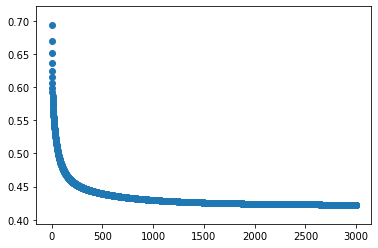

In [87]:
fig,ax = plt.subplots()
xxa = np.arange(3000)
ax.scatter(xxa,j);